## Linear regression and evaluation metrics Assignment

### 1. What does R-squared represent in a regression model?

R-squared, also known as the coefficient of determination, represents the proportion of variance in the dependent variable that is predictable from the independent variables.

* Value ranges from 0 to 1.
* An R-squared of 0.9 means 90% of the data variance is explained by the model.


### 2. What are the assumptions of linear regression?

* Linearity: The relationship between X and y is linear.
* Independence: Observations are independent of each other.
* Homoscedasticity: Constant variance of residuals.
* Normality: Residuals are normally distributed.
* No multicollinearity: Predictors are not highly correlated.


### 3. What is the difference between R-squared and Adjusted R-squared?

* R-squared increases with the number of predictors, even if they are irrelevant.
* Adjusted R-squared adjusts for the number of predictors, penalizing irrelevant variables and providing a more accurate measure for model performance.


### 4. Why do we use Mean Squared Error (MSE)?

* Measures average squared difference between predicted and actual values.
* Penalizes larger errors more than smaller ones.
* Helps optimize models during training by minimizing loss.


### 5. What does an Adjusted R-squared value of 0.85 indicate?

It indicates that approximately 85% of the variability in the response variable is explained by the predictors, accounting for the number of predictors in the model.


### 6. How do we check for normality of residuals in linear regression?

* Visual methods: Histogram, Q-Q plot.
* Statistical tests: Shapiro-Wilk, Kolmogorov-Smirnov tests.
* Residuals should follow a bell-shaped curve if normal.


### 7. What is multicollinearity, and how does it impact regression?

* It occurs when independent variables are highly correlated.
* Can inflate standard errors of coefficients, leading to unreliable estimates.
* Makes it difficult to determine the effect of individual predictors.


### 8. What is Mean Absolute Error (MAE)?

* Average of the absolute differences between predicted and actual values.
* Unlike MSE, it treats all errors equally.
* Less sensitive to outliers.


### 9. What are the benefits of using an ML pipeline?

* Automates and streamlines preprocessing and modeling steps.
* Ensures reproducibility.
* Reduces risk of data leakage.
* Simplifies deployment and cross-validation.


### 10. Why is RMSE considered more interpretable than MSE?

* RMSE (Root Mean Squared Error) is in the same unit as the target variable.
* Easier to interpret the scale of error directly.

### 11. What is pickling in Python, and how is it useful in ML?

* Pickling is a process of serializing Python objects into a byte stream.
* In ML, it allows saving trained models for reuse without retraining.


### 12. What does a high R-squared value mean?

* Indicates that a large proportion of variance in the dependent variable is explained by the model.
* May not always imply a good model—can be misleading if overfitting exists.


### 13. What happens if linear regression assumptions are violated?

* Estimates may become biased or inefficient.
* Predictions may be unreliable.
* Statistical inferences (like p-values) may be invalid.


### 14. How can we address multicollinearity in regression?

* Remove highly correlated variables.
* Use techniques like Principal Component Analysis (PCA).
* Regularization methods like Ridge or Lasso regression.


### 15. How can feature selection improve model performance in regression analysis?

* Reduces overfitting.
* Improves model interpretability.
* Speeds up computation.
* Eliminates irrelevant or redundant variables.


### 16. How is Adjusted R-squared calculated?

Adjusted R² = 1 - \[(1 - R²) × (n - 1)/(n - k - 1)]
Where:

* R² = original R-squared,
* n = number of observations,
* k = number of predictors.


### 17. Why is MSE sensitive to outliers?

* Because it squares the error, large deviations get disproportionately larger penalties.
* Even one outlier can significantly increase MSE.


### 18. What is the role of homoscedasticity in linear regression?

* Assumes constant variance of residuals across all levels of independent variables.
* If violated (i.e., heteroscedasticity), estimates of coefficients may remain unbiased but standard errors become incorrect.


### 19. What is Root Mean Squared Error (RMSE)?

* Square root of the average of squared differences between predicted and actual values.
* Emphasizes larger errors more due to squaring, but results in interpretable units.

### 20. Why is pickling considered risky?

* Can execute arbitrary code during loading (security risk).
* Not language or version portable.
* May break across Python versions or platforms.


### 21. What alternatives exist to pickling for saving ML models?

* Joblib (more efficient for large numpy arrays).
* ONNX (Open Neural Network Exchange) for cross-platform compatibility.
* PMML, HDF5, or model.save() methods (e.g., in TensorFlow).


### 22. What is heteroscedasticity, and why is it a problem?

* Condition where variance of residuals is not constant across data points.
* Leads to inefficient estimates and invalid statistical tests.


### 23. How can interaction terms enhance a regression model's predictive power?

* Captures relationships where the effect of one variable depends on another.
* Helps model complex, real-world interactions that linear terms cannot.



1. Visualize distribution of errors using Seaborn's diamonds dataset

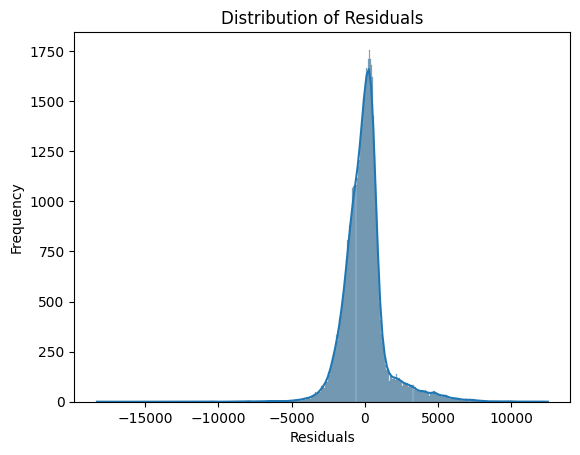

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load diamonds dataset
df = sns.load_dataset('diamonds')

# Select numeric predictors
X = df[['carat', 'depth', 'table']]
y = df['price']

# Add constant
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Plot distribution of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


2. Calculate MSE, MAE, and RMSE

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Example true and predicted values
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# Calculate errors
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 0.375
MAE: 0.5
RMSE: 0.6123724356957945


3. Check linear regression assumptions

          carat     depth     table
carat  1.000000  0.028224  0.181618
depth  0.028224  1.000000 -0.295779
table  0.181618 -0.295779  1.000000


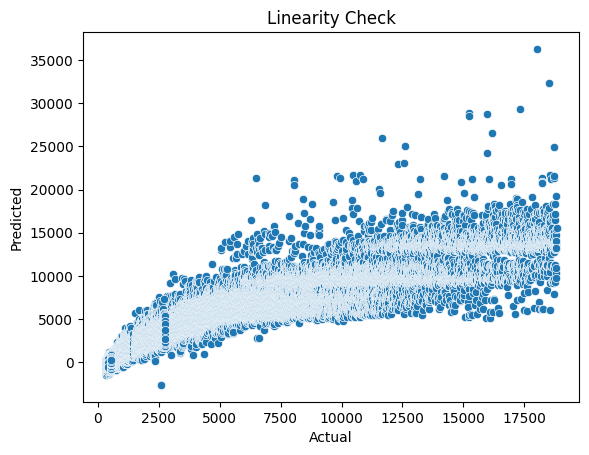

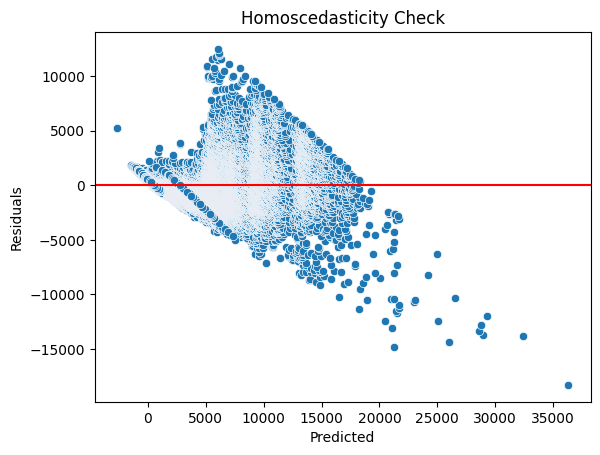

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load dataset
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table']]
y = df['price']

# Correlation matrix for multicollinearity
print(X.corr())

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()
residuals = y - model.predict(X_const)

# Linearity check
sns.scatterplot(x=y, y=model.predict(X_const))
plt.title("Linearity Check")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Homoscedasticity check
sns.scatterplot(x=model.predict(X_const), y=residuals)
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(0, color='red')
plt.show()


4. ML pipeline with feature scaling and multiple models

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

# Load dataset
df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor()
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name} R-squared: {r2_score(y_test, y_pred)}")


LinearRegression R-squared: 0.853185544894256
Ridge R-squared: 0.8531859226121741
RandomForest R-squared: 0.8708969210346187


5. Simple linear regression: coefficients, intercept, R²

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load dataset
df = sns.load_dataset('diamonds').dropna()
X = df[['carat']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Output
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X_test, y_test)}")


Coefficient: 7768.910490360821
Intercept: -2261.9117456492177
R-squared: 0.8489390686155808


6. Analyzing relationship between total_bill and tip (Seaborn tips dataset)

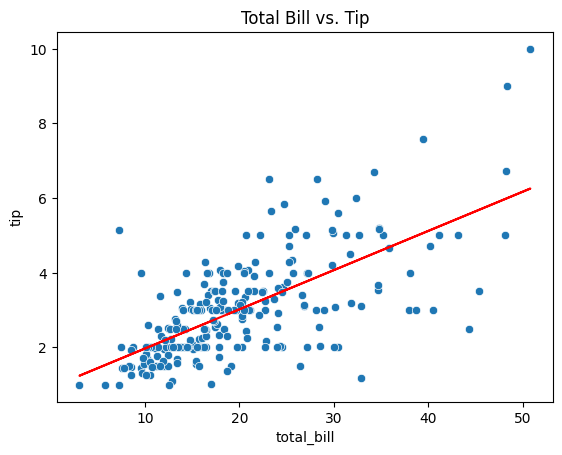

Coefficient: 0.10502451738435337
Intercept: 0.9202696135546731


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = sns.load_dataset('tips')
X = df[['total_bill']]
y = df['tip']

# Fit model
model = LinearRegression().fit(X, y)

# Plot regression line
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.plot(df['total_bill'], model.predict(X), color='red')
plt.title('Total Bill vs. Tip')
plt.show()

# Print coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


7. Fit a simple linear regression model to synthetic data and plot regression line

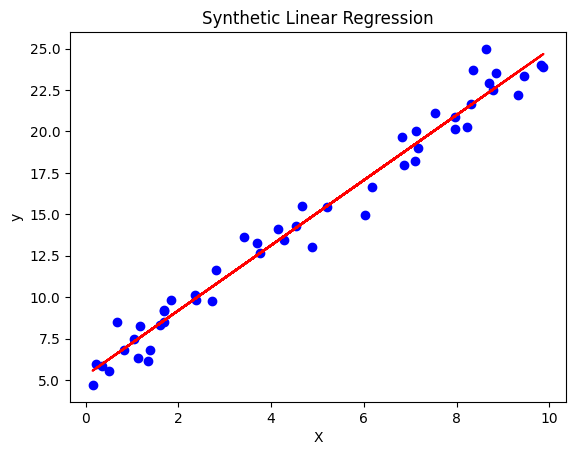

Coefficient: 1.9660938654514621
Intercept: 5.264184699498092


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Synthetic data
X = np.random.rand(50, 1) * 10
y = 2 * X + 5 + np.random.randn(50, 1)

# Fit model
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Synthetic Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print(f"Coefficient: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")


8. Pickle a trained linear regression model and save to file

In [8]:
import pickle
from sklearn.linear_model import LinearRegression

# Fit a dummy model
X = [[1], [2], [3], [4]]
y = [2, 4, 6, 8]
model = LinearRegression().fit(X, y)

# Save model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model pickled successfully!")


Model pickled successfully!


9. Fit polynomial regression (degree 2) and plot regression curve

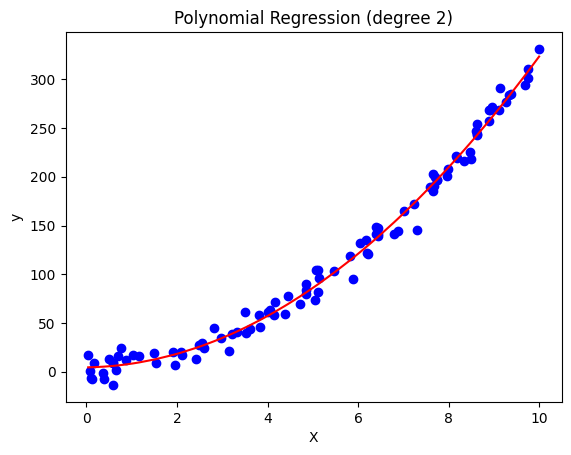

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = 3 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 10

# Fit polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression (degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


10. Generate synthetic data and fit simple linear regression, print coefficients

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 4 * X + 3 + np.random.randn(100, 1)  # y = 4X + 3 + noise

# Fit model
model = LinearRegression().fit(X, y)

# Print coefficients
print(f"Coefficient: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")


Coefficient: 3.9540226772876963
Intercept: 3.2150961575467534


11. Fit polynomial regression models of different degrees and compare performance

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 1.5 * X**2 - 2 * X + 5 + np.random.randn(100, 1) * 5

# Fit models of different degrees
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree}: R-squared = {r2:.4f}")


Degree 1: R-squared = 0.8925
Degree 2: R-squared = 0.9871
Degree 3: R-squared = 0.9871
Degree 4: R-squared = 0.9873


12. Fit a simple linear regression with two features and print coefficients, intercept, R²

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Synthetic dataset with 2 features
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Print
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared on test set: {model.score(X_test, y_test)}")


Coefficients: [86.31018533 73.66927906]
Intercept: 0.06595480364319961
R-squared on test set: 0.9836279308340317


13. Generate synthetic data, fit a regression, and visualize regression line with data points

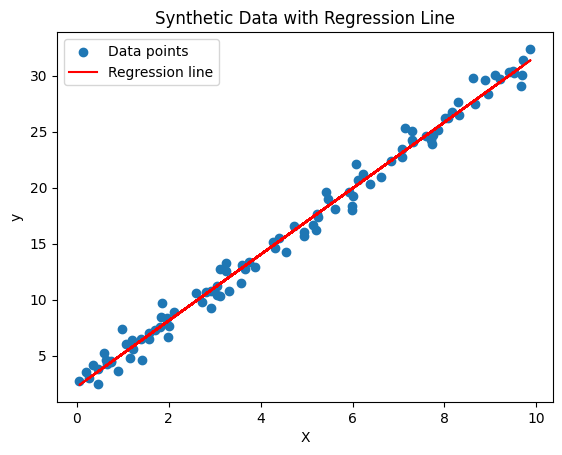

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + 2 + np.random.randn(100, 1)

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data with Regression Line')
plt.legend()
plt.show()


14. Check multicollinearity with VIF

In [14]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Synthetic data
np.random.seed(42)
X = pd.DataFrame(
    np.random.rand(100, 3),
    columns=['feature1', 'feature2', 'feature3']
)

# Compute VIF
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


    Feature       VIF
0  feature1  2.657195
1  feature2  2.803703
2  feature3  2.554971


15. Generate synthetic data for a polynomial relationship (degree 4), fit a model, and plot regression curve

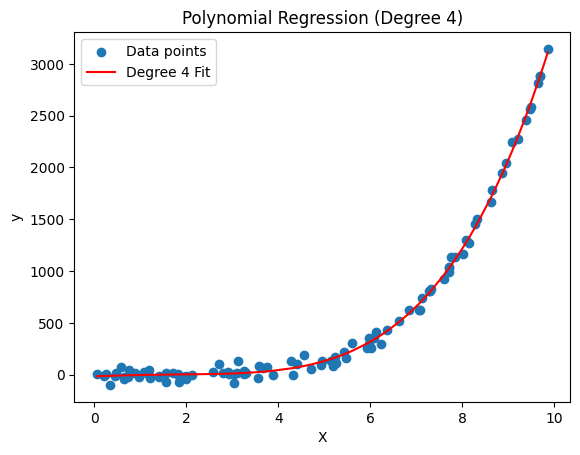

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = 0.5 * X**4 - 2 * X**3 + 3 * X**2 - X + np.random.randn(100, 1) * 50

# Fit polynomial regression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# Prediction
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Degree 4 Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()


16. ML pipeline with data standardization and multiple linear regression, print R²

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Synthetic data
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
print(f"R-squared on test set: {pipeline.score(X_test, y_test):.4f}")


R-squared on test set: 0.9780


17. Perform polynomial regression (degree 3) on synthetic data and plot curve

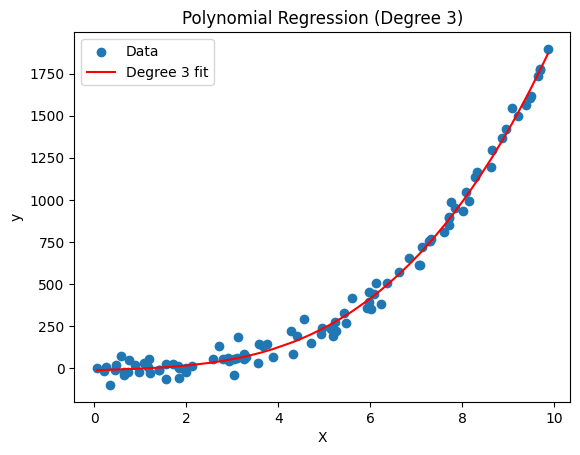

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = 2 * X**3 - X**2 + 3 * X + np.random.randn(100, 1) * 50

# Fit polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Degree 3 fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


18. Multiple linear regression on synthetic data with 5 features

In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Synthetic data with 5 features
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Print coefficients and R²
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared on test set: {model.score(X_test, y_test):.4f}")


Coefficients: [ 2.83386855 11.01451652 64.88463996 17.94510226 69.86671833]
Intercept: 0.9732356670736415
R-squared on test set: 0.9902


19. Generate synthetic data for linear regression, fit model, and visualize

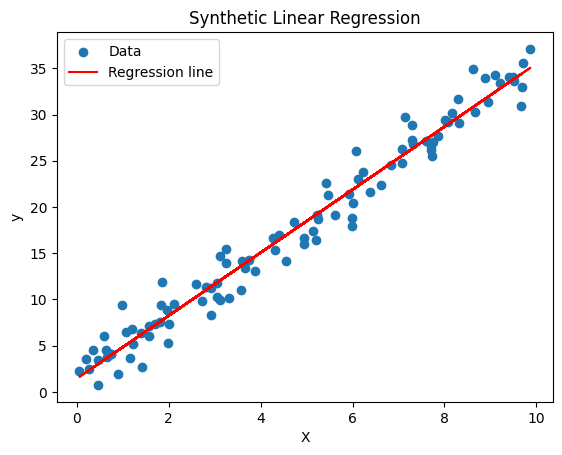

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3.5 * X + 1 + np.random.randn(100, 1) * 2

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Linear Regression')
plt.legend()
plt.show()


20. Synthetic dataset with 3 features and multiple linear regression, print R² and coefficients

In [20]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Synthetic data with 3 features
X, y = make_regression(n_samples=200, n_features=3, noise=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Print results
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared on test set: {model.score(X_test, y_test):.4f}")


Coefficients: [71.94505122 22.73378805 72.35489732]
Intercept: -0.3182247514543306
R-squared on test set: 0.9962


21. Serialize and deserialize ML models using joblib

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import joblib

# Synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Save model
joblib.dump(model, 'linear_model_joblib.pkl')
print("Model saved!")

# Load model
loaded_model = joblib.load('linear_model_joblib.pkl')
print(f"Loaded model R-squared: {loaded_model.score(X_test, y_test):.4f}")


Model saved!
Loaded model R-squared: 0.9836


22. Linear regression with categorical features using one-hot encoding (Seaborn tips dataset)

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load tips data
df = sns.load_dataset('tips')
df = pd.get_dummies(df, drop_first=True)  # One-hot encode

X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression().fit(X_train, y_train)

print(f"R-squared on test set: {model.score(X_test, y_test):.4f}")


R-squared on test set: 0.4373


23. Compare Ridge Regression with Linear Regression on a synthetic dataset

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Synthetic data
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
lin_model = LinearRegression().fit(X_train, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train, y_train)

# Print results
print(f"Linear Regression R²: {lin_model.score(X_test, y_test):.4f}")
print(f"Ridge Regression R²: {ridge_model.score(X_test, y_test):.4f}")
print("\nLinear coefficients:", lin_model.coef_)
print("Ridge coefficients:", ridge_model.coef_)


Linear Regression R²: 0.9902
Ridge Regression R²: 0.9903

Linear coefficients: [ 2.83386855 11.01451652 64.88463996 17.94510226 69.86671833]
Ridge coefficients: [ 2.86506835 10.94378116 64.47217686 17.81093809 69.4070294 ]


24. Cross-validate a Linear Regression model on synthetic data

In [24]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Synthetic data
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

# Fit model with CV
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {scores}")
print(f"Mean R-squared: {scores.mean():.4f}")


Cross-validated R-squared scores: [0.99105995 0.99136948 0.98668382 0.98911824 0.98312729]
Mean R-squared: 0.9883


25. Compare polynomial regression models of different degrees (print R²)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 0.5 * X**3 - 2 * X**2 + 3 * X + np.random.randn(100, 1) * 10

# Test degrees
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree}: R-squared = {r2:.4f}")


Degree 1: R-squared = 0.7592
Degree 2: R-squared = 0.9806
Degree 3: R-squared = 0.9902
Degree 4: R-squared = 0.9903
Degree 5: R-squared = 0.9903
